In [1]:
pip install pandas numpy statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/katherinefeng/Desktop/All Merged.csv')

In [4]:
df.info

<bound method DataFrame.info of      Year  Week        Date   Need States   Dc Amount  Store Amt On Hand  \
0    2021     1  2021-01-04  Need State 1  1445929.50         3667244.25   
1    2021     1  2021-01-04  Need State 2  2405549.25         2784957.75   
2    2021     1  2021-01-04  Need State 3  1618319.25         3838764.00   
3    2021     1  2021-01-04  Need State 4  1271980.50         1893348.00   
4    2021     1  2021-01-04  Need State 5   601577.25         1055337.75   
..    ...   ...         ...           ...         ...                ...   
720  2023    41  2023-10-09  Need State 1  2191140.00         5903348.25   
721  2023    41  2023-10-09  Need State 2  1084670.25         4117591.50   
722  2023    41  2023-10-09  Need State 3  1180187.25         4954347.00   
723  2023    41  2023-10-09  Need State 4   737967.00         1948076.25   
724  2023    41  2023-10-09  Need State 5  1352883.75         1329480.75   

     Factory POS  Ecomm POS (Factory $)      Sales  Tra

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
df_need_state_5 = df[df['Need States'] == 'Need State 5']

In [7]:
df_weekly = df_need_state_5.resample('W').sum()

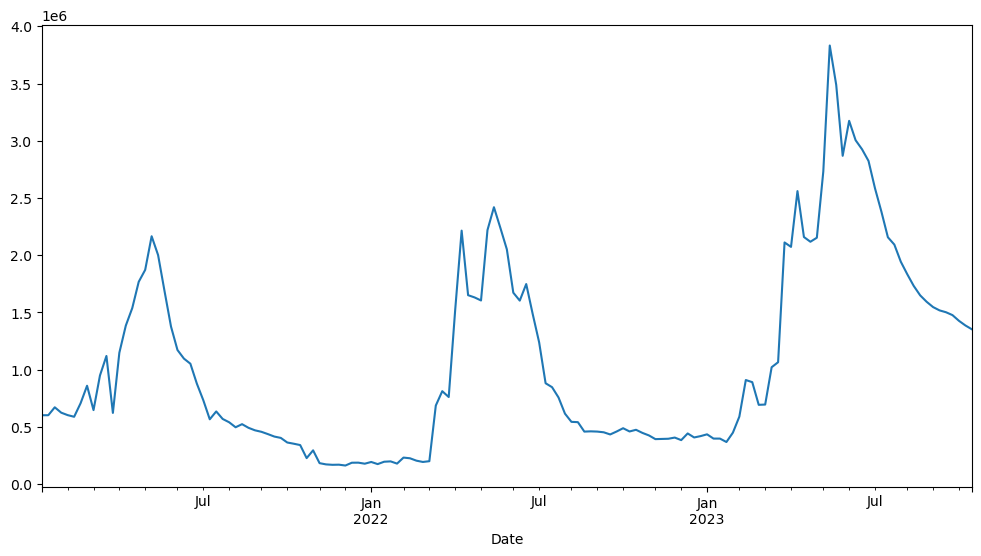

In [8]:
# Needstate 5 Dc Amount from 2021 to 2023
df_weekly['Dc Amount'].plot(figsize=(12, 6))
plt.show()

In [9]:
# We can tune the p, d, q and P, D, Q. 
# I tried other numbers but the graph doesn't seem to be right.
# S means seasonal period so I set it to 52 (weeks)
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 52  

In [10]:
# Dc amount model
order = (p, d, q)  
seasonal_order = (P, D, Q, S) 

model = SARIMAX(df_weekly['Dc Amount'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74278D+00    |proj g|=  2.09878D-02


 This problem is unconstrained.



At iterate    5    f=  8.73939D+00    |proj g|=  1.07326D-02

At iterate   10    f=  8.73526D+00    |proj g|=  8.78796D-03

At iterate   15    f=  8.73392D+00    |proj g|=  5.31370D-03

At iterate   20    f=  8.73385D+00    |proj g|=  5.89750D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     22      1     0     0   5.898D-07   8.734D+00
  F =   8.7338546582296157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                          Dc Amount   No. Observations:               

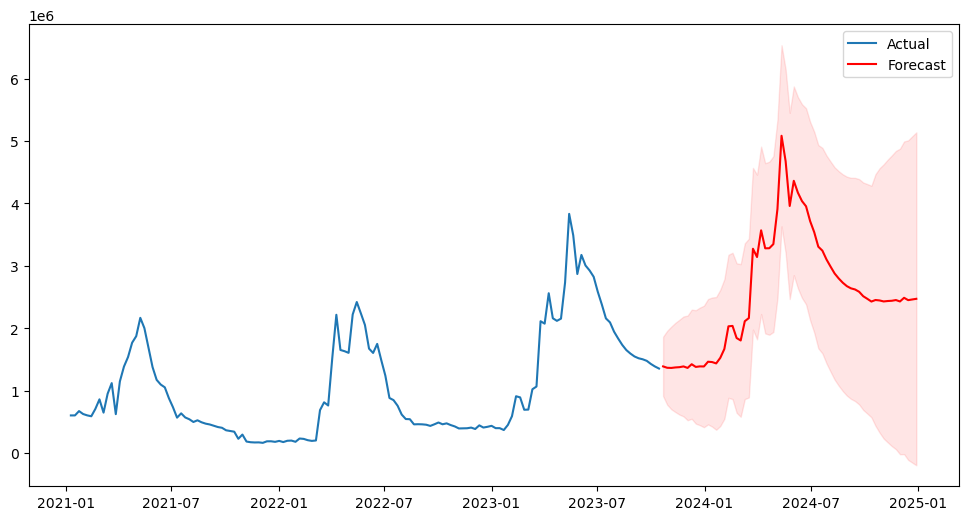

In [11]:
# Needstate 5 Dc Amount Forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha=0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Dc Amount'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Dc Amount'], forecast.conf_int()['upper Dc Amount'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [12]:
# Extract forecast mean
forecast_mean_DC = forecast.predicted_mean

# Extract confidence intervals
forecast_conf_int = forecast.conf_int()

# Extract lower and upper bounds
lower_bound = forecast_conf_int['lower Dc Amount']
upper_bound = forecast_conf_int['upper Dc Amount']

In [13]:
# Print the first few forecasted mean values
forecast_mean_DC

2023-10-22    1.387500e+06
2023-10-29    1.365315e+06
2023-11-05    1.362716e+06
2023-11-12    1.370762e+06
2023-11-19    1.375110e+06
                  ...     
2024-12-01    2.428445e+06
2024-12-08    2.487197e+06
2024-12-15    2.449596e+06
2024-12-22    2.460371e+06
2024-12-29    2.470728e+06
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [14]:
forecast_mean.to_csv('~/Desktop/forecasted_mean_Dc.csv', header=['Dc Amount'])

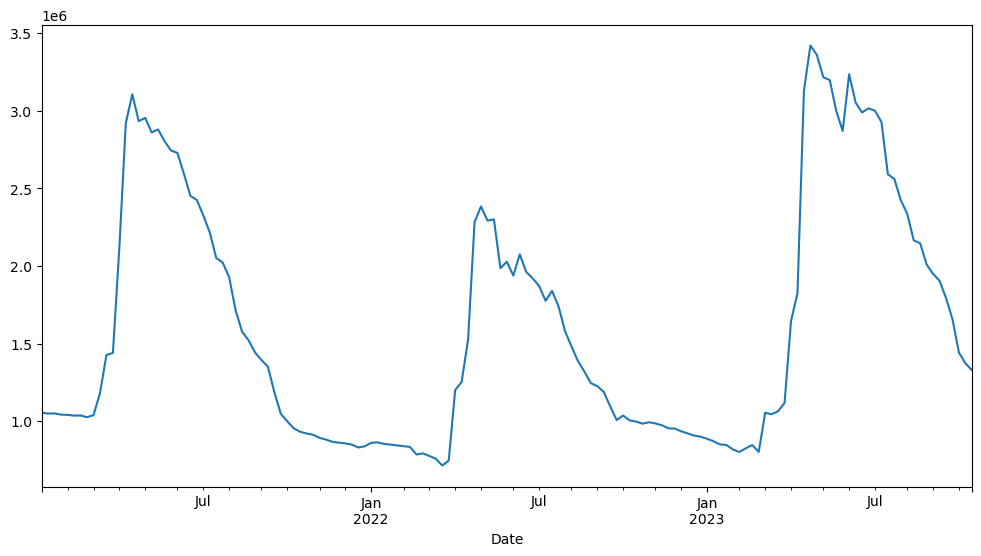

In [15]:
# Store amount on hand from 2021 to 2023
df_weekly['Store Amt On Hand'].plot(figsize=(12, 6))
plt.show()

In [16]:
# Store Amt on Hand model
order = (p, d, q)  
seasonal_order = (P, D, Q, S) 

model = SARIMAX(df_weekly['Store Amt On Hand'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65693D+00    |proj g|=  3.25953D-01

At iterate    5    f=  8.58941D+00    |proj g|=  1.57036D-02

At iterate   10    f=  8.58866D+00    |proj g|=  1.61131D-03

At iterate   15    f=  8.58839D+00    |proj g|=  5.21929D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   1.127D-05   8.588D+00
  F =   8.5883899214429587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

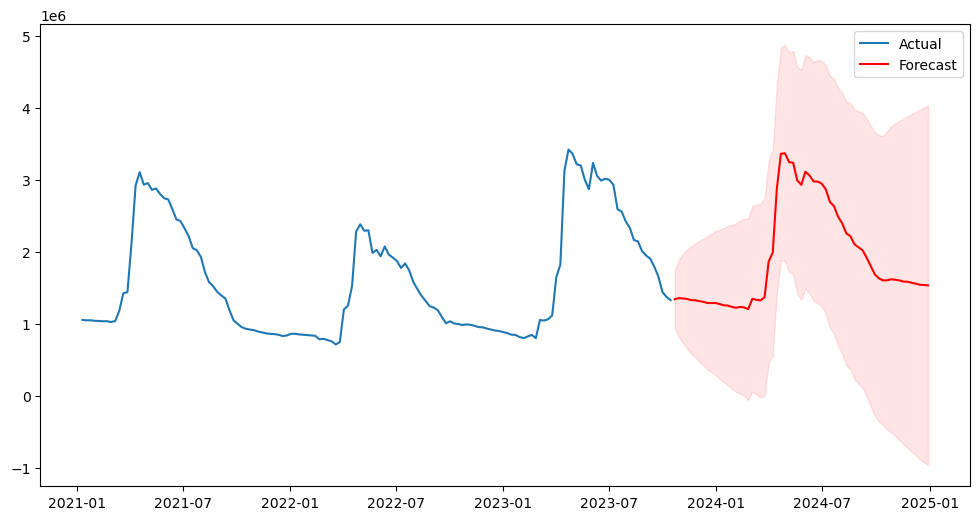

In [17]:
# Needstate 5 Store amt on hand Forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha=0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Store Amt On Hand'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Store Amt On Hand'], forecast.conf_int()['upper Store Amt On Hand'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [18]:
# Extract forecast mean
forecast_mean_storeonhand = forecast.predicted_mean

In [19]:
# Print the first few forecasted mean values
forecast_mean_storeonhand

2023-10-22    1.342284e+06
2023-10-29    1.358343e+06
2023-11-05    1.353425e+06
2023-11-12    1.345988e+06
2023-11-19    1.331063e+06
                  ...     
2024-12-01    1.570925e+06
2024-12-08    1.558915e+06
2024-12-15    1.544012e+06
2024-12-22    1.540246e+06
2024-12-29    1.535582e+06
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [20]:
forecast_mean_storeonhand.to_csv('~/Desktop/forecasted_mean_storeamountonhand.csv', header=['Store amount on hand'])

In [21]:
# Factory POS model
order = (p, d, q)  # Define order parameters (p, d, q)
seasonal_order = (P, D, Q, S)  # Define seasonal order parameters (P, D, Q, S)

model = SARIMAX(df_weekly['Factory POS'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.93807D+00    |proj g|=  4.17370D-01

At iterate    5    f=  7.84220D+00    |proj g|=  3.66597D-02

At iterate   10    f=  7.82408D+00    |proj g|=  2.40743D-02

At iterate   15    f=  7.81857D+00    |proj g|=  7.36675D-03

At iterate   20    f=  7.81834D+00    |proj g|=  4.09175D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   4.092D-06   7.818D+00
  F =   7.8183361458561462     

CONVERG

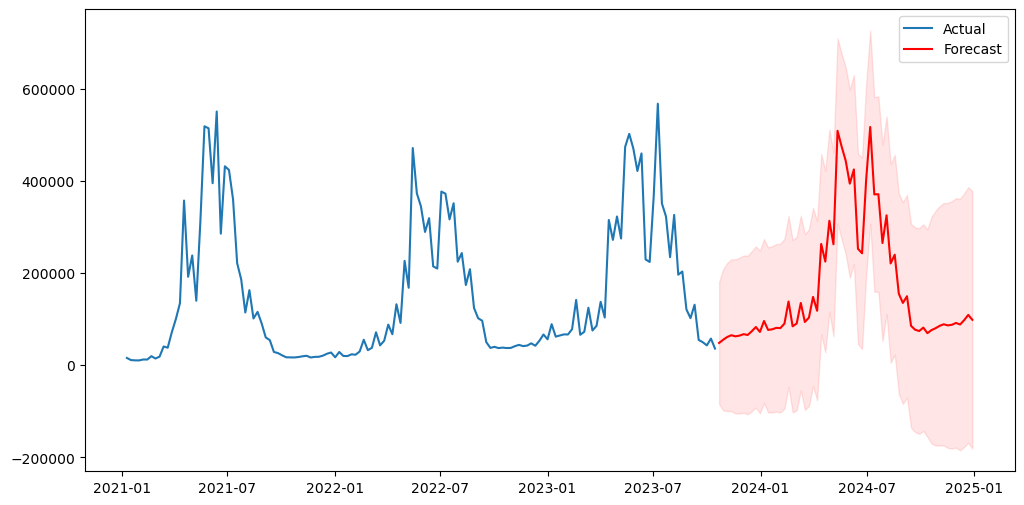

In [22]:
# Needstate 5 Facotry POS forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha-0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Factory POS'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Factory POS'], forecast.conf_int()['upper Factory POS'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [23]:
# Extract forecast mean
forecast_mean_factorypos = forecast.predicted_mean

In [24]:
forecast_mean_factorypos

2023-10-22     48301.850003
2023-10-29     55230.133608
2023-11-05     61311.192773
2023-11-12     65052.157859
2023-11-19     62633.282772
                  ...      
2024-12-01     91754.564241
2024-12-08     88323.144881
2024-12-15     97703.185978
2024-12-22    109107.025612
2024-12-29     98515.595588
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [25]:
forecast_mean_storeonhand.to_csv('~/Desktop/forecasted_mean_factorypos.csv', header=['Factory POS'])

In [26]:
# Ecomm POS model
order = (p, d, q)  # Define order parameters (p, d, q)
seasonal_order = (P, D, Q, S)  # Define seasonal order parameters (P, D, Q, S)

model = SARIMAX(df_weekly['Ecomm POS (Factory $)'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74355D+00    |proj g|=  5.33662D-01


 This problem is unconstrained.



At iterate    5    f=  5.57216D+00    |proj g|=  1.13032D-02

At iterate   10    f=  5.57180D+00    |proj g|=  3.53113D-03

At iterate   15    f=  5.57113D+00    |proj g|=  2.03037D-04

At iterate   20    f=  5.57105D+00    |proj g|=  6.17894D-03

At iterate   25    f=  5.55532D+00    |proj g|=  1.29504D-01

At iterate   30    f=  5.48599D+00    |proj g|=  2.41961D-02

At iterate   35    f=  5.47926D+00    |proj g|=  4.54523D-03

At iterate   40    f=  5.47855D+00    |proj g|=  1.69245D-03

At iterate   45    f=  5.47845D+00    |proj g|=  1.55050D-03

At iterate   50    f=  5.47841D+00    |proj g|=  2.73771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:              Ecomm POS (Factory $)   No. Observations:                  145
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -794.369
Date:                            Mon, 27 Nov 2023   AIC                           1598.738
Time:                                    20:51:13   BIC                           1611.347
Sample:                                01-10-2021   HQIC                          1603.827
                                     - 10-15-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994    511.466      0.002      0.998   -1001.456    1003.454
ma.L1         -0.9994    500.378   

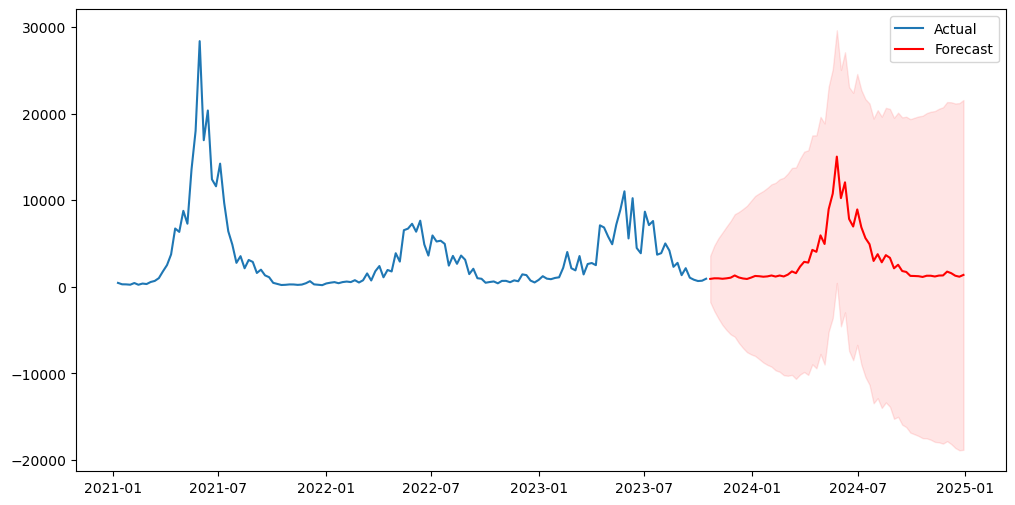

In [27]:
# Needstate 5 Ecomm POS forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha=0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Ecomm POS (Factory $)'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Ecomm POS (Factory $)'], forecast.conf_int()['upper Ecomm POS (Factory $)'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [28]:
# Extract forecast mean
forecast_mean_ecomm = forecast.predicted_mean

In [29]:
forecast_mean_ecomm

2023-10-22     910.402130
2023-10-29     976.559345
2023-11-05     973.708303
2023-11-12     924.786108
2023-11-19     974.728292
                 ...     
2024-12-01    1750.686069
2024-12-08    1570.477110
2024-12-15    1275.906942
2024-12-22    1163.221239
2024-12-29    1368.725097
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [30]:
forecast_mean_ecomm.to_csv('~/Desktop/forecasted_mean_ecomm.csv', header=['Ecomm POS'])

In [31]:
# Total SALES model
order = (p, d, q)  
seasonal_order = (P, D, Q, S) 

model = SARIMAX(df_weekly['Sales'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.15797D+00    |proj g|=  2.64131D-01

At iterate    5    f=  9.04265D+00    |proj g|=  2.69267D-02

At iterate   10    f=  9.03029D+00    |proj g|=  2.33891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   6.366D-07   9.030D+00
  F =   9.0302874316083823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

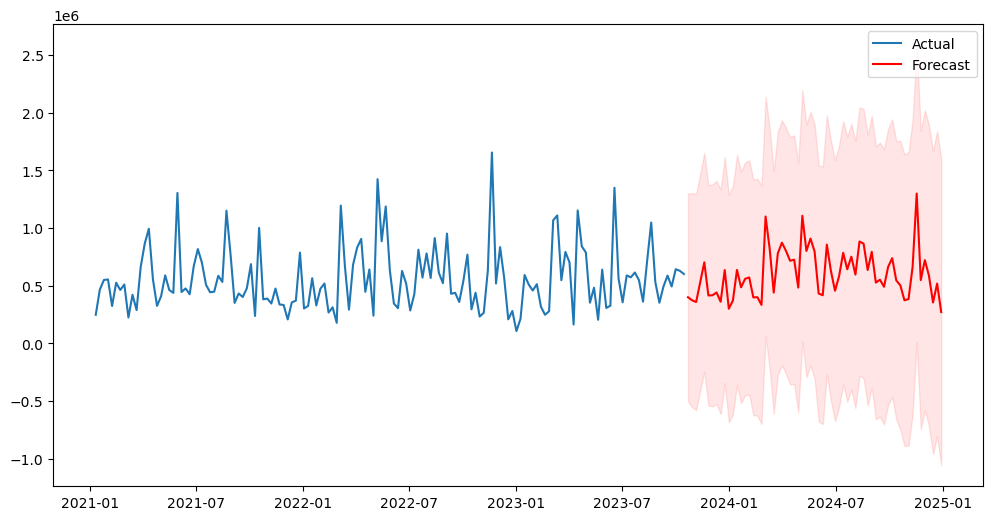

In [32]:
# Needstate 5 SALES forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha = 0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Sales'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Sales'], forecast.conf_int()['upper Sales'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [33]:
# Extract forecast mean
forecast_mean_sales = forecast.predicted_mean

In [34]:
forecast_mean_sales

2023-10-22    399407.480155
2023-10-29    372608.659506
2023-11-05    357633.855108
2023-11-12    530076.008988
2023-11-19    701575.603444
                  ...      
2024-12-01    720543.757629
2024-12-08    586333.833197
2024-12-15    353373.724918
2024-12-22    517708.828223
2024-12-29    270564.914995
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [35]:
forecast_mean_sales.to_csv('~/Desktop/forecasted_mean_sales.csv', header=['Total sales'])

In [36]:
# A NEW set of p, d, q that may be better than 1, 1, 1 **I think 
# I tried other numbers but the graph doesn't seem to be right.
# S means seasonal period so I set it to 52 (weeks)
p, d, q = 2, 1, 1
P, D, Q, S = 2, 1, 1, 52  

In [37]:
# Total Trade Spend model
order = (p, d, q)  
seasonal_order = (P, D, Q, S) 

model = SARIMAX(df_weekly['Trade Spend'], order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

/Users/katherinefeng/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51986D+00    |proj g|=  2.90656D-01


 This problem is unconstrained.



At iterate    5    f=  6.42295D+00    |proj g|=  5.59820D-03

At iterate   10    f=  6.42138D+00    |proj g|=  6.82626D-03

At iterate   15    f=  6.42110D+00    |proj g|=  1.11949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   3.819D-05   6.421D+00
  F =   6.4210994216472166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                        Trade Spend   No. Observations:                  145
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 52)   Log

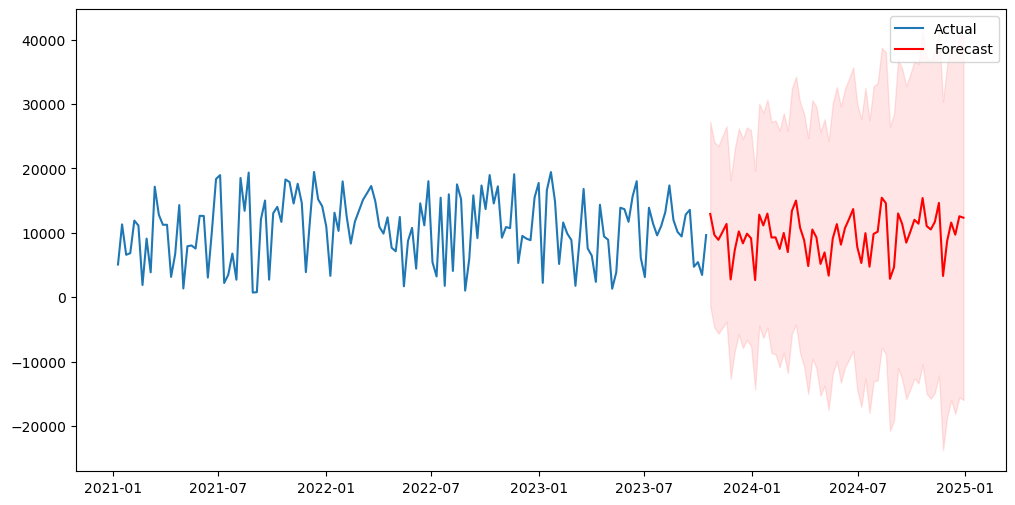

In [38]:
# Needstate 5 Trade spend Forecast until 2025
forecast_steps = 63  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_weekly.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_mean = forecast.predicted_mean

# Visualize the results, alpha = 0.1
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Trade Spend'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Trade Spend'], forecast.conf_int()['upper Trade Spend'], color='red', alpha=0.1)
plt.legend()
plt.show()

In [39]:
# Extract forecast mean
forecast_mean_tradespend = forecast.predicted_mean

In [40]:
forecast_mean_tradespend

2023-10-22    12934.877014
2023-10-29     9698.954646
2023-11-05     8911.050109
2023-11-12    10126.717858
2023-11-19    11377.180550
                  ...     
2024-12-01     8701.859507
2024-12-08    11595.780508
2024-12-15     9708.940618
2024-12-22    12570.633858
2024-12-29    12352.170263
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [41]:
forecast_mean_tradespend.to_csv('~/Desktop/forecasted_mean_tradespend.csv', header=['Total trade spend'])